In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers = 2, tol=1e-6, eps=0.05, embedtxt=True)

In [3]:
pf.session.load_data(name='ttt', src=FILE, fpath='./hce_data/balance_numerical/balance_numerical.csv', check_param=True, na_values='empty')

INFO:profiler.utility:[0.009785890579223633] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': 'empty', 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "class": "categorical",
    "left_weight": "numeric",
    "left_distance": "numeric",
    "right_weight": "numeric",
    "right_distance": "numeric"
}
INFO:profiler.data.dataset:(possible types: numeric, categorical, text, date)
INFO:profiler.data.dataset:inferred operators of attributes: {'class': ['equal'], 'left_weight': ['equal'], 'left_distance': ['equal'], 'right_weight': ['equal'], 'right_distance': ['equal']}
INFO:profiler.data.dataset:(possible operators: equal, notequal, greater_than, less_than)
INFO:profiler.utility:[0.04173612594604492] Load Data execution time: 0.03195023536682129



In [4]:
pf.session.load_training_data(multiplier = None)

INFO:profiler.utility:[0.04741263389587402] Create Training Data start

INFO:profiler.data.transformer:needs multiplier = 3 to bound the error in inv cov estimation <= 0.05000000
INFO:profiler.data.transformer:use multiplier = 3, and the bound is 0.00192296
INFO:profiler.data.transformer:Draw Pairs
100%|██████████| 5/5 [00:00<00:00, 456.48it/s]
INFO:profiler.data.transformer:Number of training samples: 3125
INFO:profiler.data.transformer:Computing Differences
INFO:profiler.data.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[0.10988044738769531] Create Training Data execution time: 0.06246781349182129



In [5]:
# set sparsity to 0 for exp_reproduce 
autoregress_matrix = pf.session.learn_structure(sparsity=0, infer_order=True)

INFO:profiler.utility:[0.11407065391540527] Learn Structure start

INFO:profiler.learner:use threshold 0.3276
INFO:profiler.utility:[0.1765594482421875] Learn Structure execution time: 0.06248879432678223



In [6]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[0.1816549301147461] Get Dependencies start

INFO:profiler.utility:[0.18509340286254883] Get Dependencies execution time: 0.0034384727478027344



/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


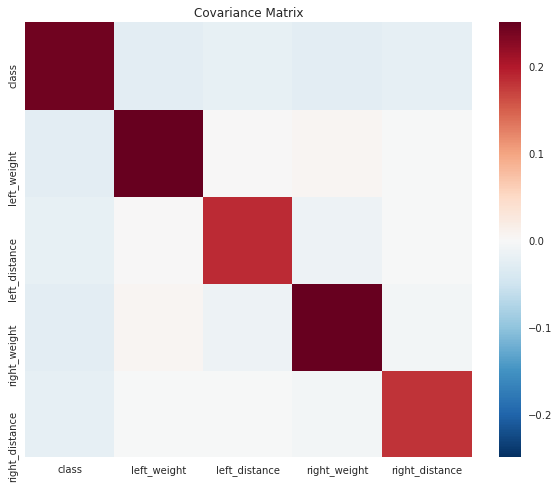

In [7]:
pf.session.visualize_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


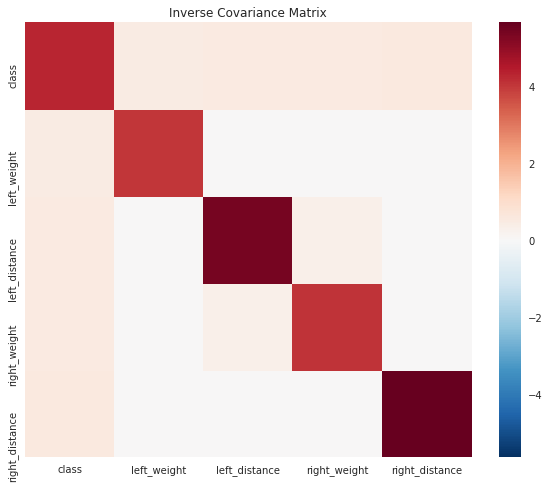

In [8]:
pf.session.visualize_inverse_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


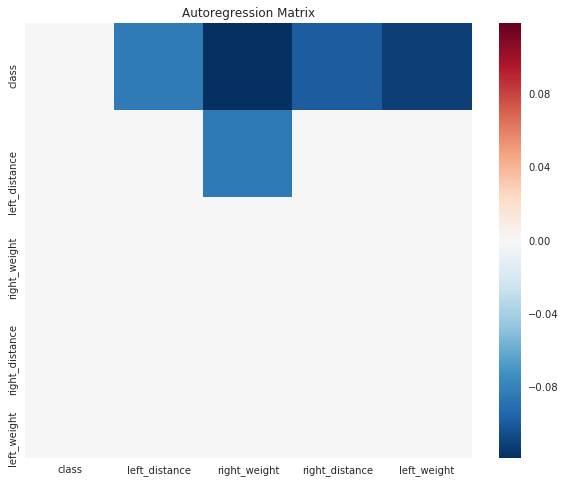

In [9]:
pf.session.visualize_autoregression()

In [10]:
pf.session.timer.get_stat()

,time_point,msg,execution_time
0,0.009786,start: Load Data,0.000000
1,0.041736,end: Load Data,0.031950
2,0.047413,start: Create Training Data,0.000000
3,0.109880,end: Create Training Data,0.062468
4,0.114071,start: Learn Structure,0.000000
5,0.176559,end: Learn Structure,0.062489
6,0.181655,start: Get Dependencies,0.000000
7,0.185093,end: Get Dependencies,0.003438
8,0.185093,total_execution_time,0.160345


In [11]:
pf.session.timer.to_csv()